In [1]:
import os

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model_path = os.path.join('.', 'runs', 'detect', 'train3', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

filename = r'data/images/Cars307.png'
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
frame = image


0: 448x640 1 number_plate, 58.9ms
Speed: 2.4ms preprocess, 58.9ms inference, 5.3ms postprocess per image at shape (1, 3, 448, 640)
[169.3814239501953, 160.7922821044922, 434.99224853515625, 219.9976348876953, 0.964242160320282, 0.0]


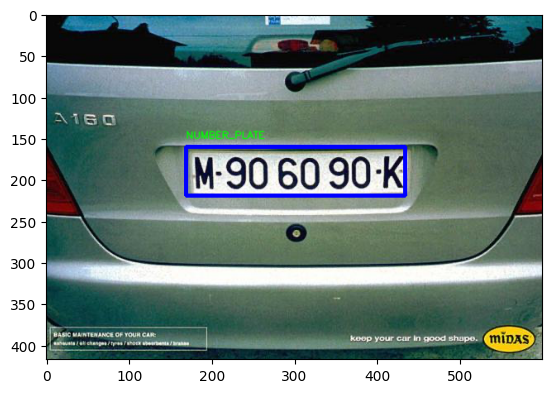

In [53]:
results = model(frame)[0]

threshold = 0.1

for result in results.boxes.data.tolist():
    print(result)
    x1, y1, x2, y2, score, class_id = result

    if score > threshold:
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 0, 255), 4)
        cv2.putText(frame, results.names[int(class_id)].upper(), (int(x1), int(y1 - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1, cv2.LINE_AA)

plt.imshow(frame)

# Extracting numbers from number plate

In [2]:
import easyocr

In [4]:
import numpy as np

# model_path = os.path.join('.', 'runs', 'detect', 'train3', 'weights', 'best.pt')

# # Load a model
# model = YOLO(model_path)  # load a custom model

# cap = cv2.VideoCapture(0)
# while cap.isOpened():
#     ret, frame = cap.read()

#     results = model(frame)

# #     cv2.imshow('YOLO', np.squeeze(results.render()))

#     results = model(frame)[0]
#     region = image[int(results[1]):int(results[3]),int(results[0]):int(results[2])]
#     reader = easyocr.Reader(['en'])
#     ocr_result = reader.readtext(region)
#     # print(ocr_result)
#     plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
#     print("Number plate number: ", ocr_result[0][1])

#     if cv2.waitKey(10) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [5]:
# from imutils.video import VideoStream
# import time

# # Initialize the VideoStream and allow the camera sensor to warm up
# vs = VideoStream(src=0).start()
# time.sleep(2.0)

# while True:
#     frame = vs.read()
#     # Your processing logic here
#     cv2.imshow('Video', frame)

#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

# cv2.destroyAllWindows()
# vs.stop()


0: 448x640 1 number_plate, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 2.7ms postprocess per image at shape (1, 3, 448, 640)
M90 60 90K


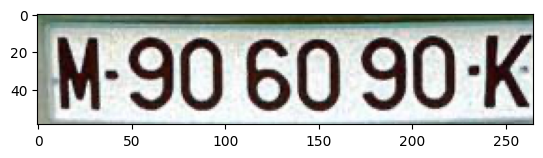

In [60]:
model_path = os.path.join('.', 'runs', 'detect', 'train3', 'weights', 'best.pt')

# Load a model
model = YOLO(model_path)  # load a custom model

filename = r'data/images/Cars307.png'
image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
frame = image

results = model(frame)[0]

region = image[int(result[1]):int(result[3]),int(result[0]):int(result[2])]
reader = easyocr.Reader(['en'])
ocr_result = reader.readtext(region)
# print(ocr_result)
plt.imshow(cv2.cvtColor(region, cv2.COLOR_BGR2RGB))
print(ocr_result[0][1])

In [56]:
ocr_result

[([[1, 3], [265, 3], [265, 59], [1, 59]], 'M906090.K', 0.45787484764913744)]

In [57]:
ocr_result[0][1]

'M906090.K'

# Saving file

In [46]:
# import csv
# import uuid

In [6]:
# '{}.jpg'.format(uuid.uuid1())

In [ ]:
# def save_results(text, region, csv_filename, folder_path):
#     img_name = '{}.jpg'.format(uuid.uuid1())
    
#     cv2.imwrite(os.path.join(folder_path, img_name), region)
    
#     with open(csv_filename, mode='a', newline='') as f:
#         csv_writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
#         csv_writer.writerow([img_name, text])

In [ ]:
# save_results(text, region, 'detection_results.csv', 'Detection_Images')